**Defuzzification** is the process of converting a fuzzy set (with degrees of membership) into a single crisp output.
We use scikit-fuzzy to demonstrate different defuzzification methods on a trapezoidal membership function.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skfuzzy/req.txt


In [2]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.0 MB/s eta 0:00:00


# Import Required Libraries

In [3]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Define the Universe of Discourse

The *universe of discourse* is the range of values over which the membership function is defined.

In [4]:
# Create trapezoidal membership function
x = np.arange(0, 5.05, 0.1)

# Create a Trapezoidal Membership Function

A trapezoidal membership function (`trapmf`) is defined by four parameters `[a, b, c, d]`.
It increases linearly from `a` to `b`, stays at 1 between `b` and `c`, and decreases linearly from `c` to `d`.

In [5]:
mfx = fuzz.trapmf(x,[2, 2.5, 3, 4.5])

# Apply Different Defuzzification Methods

`skfuzzy.defuzz` allows several defuzzification strategies:
* **centroid** → Center of gravity
* **bisector** → Vertical line that divides area into two equal halves
* **mom** → Mean of maximum (average of maxima locations)
* **som** → Smallest of maximum (left-most maximum)
* **lom** → Largest of maximum (right-most maximum)

In [6]:
# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Prepare Data for Plotting

We collect the crisp values and their corresponding membership degrees to plot vertical lines.

In [7]:
# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']

# Get membership values for each crisp point
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Visualize Membership Function & Defuzzification Results

Each defuzzification method is shown as a vertical line on the trapezoidal function.

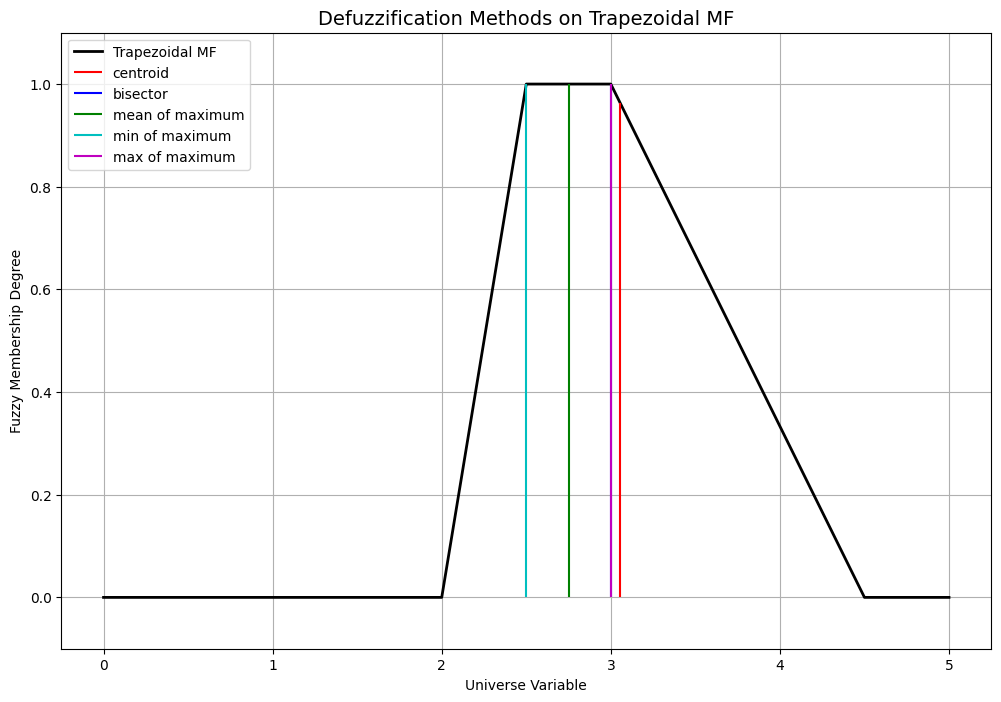

In [8]:
# Plot membership function
plt.figure(figsize=(12, 8))
plt.plot(x, mfx, 'k', linewidth=2, label='Trapezoidal MF')

# Plot vertical lines for each defuzzification method
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)

# Customize plot
plt.title("Defuzzification Methods on Trapezoidal MF", fontsize=14)
plt.ylabel("Fuzzy Membership Degree")
plt.xlabel("Universe Variable")
plt.ylim(-0.1, 1.1)
plt.legend(loc="upper left")
plt.grid(True)

plt.show()

# Output

* You’ll see the trapezoidal membership function in black.

* Vertical colored lines represent different crisp values obtained by various defuzzification strategies.